# SPSS ModelerのK-MeansノードをPythonで書き換える。

SPSS Modeler ノードリファレンス 5−18 K-Means(クラスター) - Qiita 
https://qiita.com/kawada2017/items/0f4b618e7cff8eb0a353

# データの読み込み

In [1]:
import pandas as pd
#!wget 'https://raw.githubusercontent.com/hkwd/200611Modeler2Python/master/kmeans/clusterinput2.csv'
df=pd.read_csv('clusterinput2.csv',dtype={'性別':'category','地区':'category'})
df

,CUSTID,性別,地区,アクセサリ合計金額,インナーウエア合計金額,バッグ合計金額,化粧品合計金額,衣服合計金額,靴合計金額,食品合計金額,合計金額
0,100001,F,西区,8278.0,7715.0,7243,26885,6026,26870,15707,98724
1,100004,M,北区,0.0,47262.0,10342,35251,19631,45890,11700,170076
2,100005,M,西区,10500.0,0.0,0,0,0,0,108460,118960
3,100006,M,東区,0.0,26210.0,14400,33000,11460,0,0,85070
4,100008,F,東区,1017.0,21755.0,2800,13441,2950,11123,1194,54280
...,...,...,...,...,...,...,...,...,...,...,...
2995,105967,F,北区,0.0,0.0,57800,6980,118619,0,121144,304543
2996,105970,M,東区,0.0,13621.0,12602,130994,53489,132122,13527,356355
2997,105972,F,西区,75558.0,0.0,0,2964,20730,35780,0,135032
2998,105974,F,北区,0.0,40225.0,12930,89600,42289,54602,3920,243566


In [2]:
df.dtypes

CUSTID            int64
性別             category
地区             category
アクセサリ合計金額       float64
インナーウエア合計金額     float64
バッグ合計金額           int64
化粧品合計金額           int64
衣服合計金額            int64
靴合計金額             int64
食品合計金額            int64
合計金額              int64
dtype: object

In [3]:
#NULL列の確認
df.isnull().sum()

CUSTID          0
性別             22
地区             18
アクセサリ合計金額      13
インナーウエア合計金額    15
バッグ合計金額         0
化粧品合計金額         0
衣服合計金額          0
靴合計金額           0
食品合計金額          0
合計金額            0
dtype: int64

In [4]:
from sklearn import preprocessing
import numpy as np
df_km = df.copy()
#フラグ型は0と1変換
df_km_gender = pd.get_dummies(df_km[['性別']], columns=[
                              '性別'], drop_first=True, dummy_na=True, dtype=float)
#nullは0.5に変換
df_km_gender[df_km_gender['性別_nan'] != 0] = 0.5
df_km_gender = df_km_gender.drop(['性別_nan'], axis=1)

#カテゴリ型はと√1/2への変換
#nullは0.5*√1/2に変換
dummy_weight = np.sqrt(1/2)
df_km_dist = pd.get_dummies(df_km[['地区']], columns=[
                            '地区'], dummy_na=True, dtype=float).mul(dummy_weight)
df_km_dist[df_km_dist['地区_nan'] != 0] = 0.5*dummy_weight
df_km_dist = df_km_dist.drop(['地区_nan'], axis=1)

#数値列はスケーリング
mm = preprocessing.MinMaxScaler()
df_km_num = df_km[['アクセサリ合計金額', 'インナーウエア合計金額', 'バッグ合計金額', '化粧品合計金額',
                   '衣服合計金額', '靴合計金額', '食品合計金額']]
df_km_std = pd.DataFrame(mm.fit_transform(
    df_km_num), columns=df_km_num.columns)

#nullは0.5に変換
df_km_std = df_km_std.fillna(0.5)
# 説明変数のデータフレーム
X = pd.concat([df_km_std,
               df_km_gender,
              df_km_dist], axis=1)
X


,アクセサリ合計金額,インナーウエア合計金額,バッグ合計金額,化粧品合計金額,衣服合計金額,靴合計金額,食品合計金額,性別_M,地区_北区,地区_東区,地区_西区
0,0.012942,0.005353,0.009026,0.024725,0.003869,0.047713,0.025498,0.0,0.000000,0.000000,0.707107
1,0.000000,0.032795,0.012887,0.032419,0.012605,0.081487,0.018993,1.0,0.707107,0.000000,0.000000
2,0.016416,0.000000,0.000000,0.000000,0.000000,0.000000,0.176066,1.0,0.000000,0.000000,0.707107
3,0.000000,0.018187,0.017944,0.030349,0.007358,0.000000,0.000000,1.0,0.000000,0.707107,0.000000
4,0.001590,0.015096,0.003489,0.012361,0.001894,0.019751,0.001938,0.0,0.000000,0.707107,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,0.000000,0.072026,0.006419,0.076164,0.000000,0.196657,0.0,0.707107,0.000000,0.000000
2996,0.000000,0.009452,0.015704,0.120471,0.034345,0.234608,0.021959,1.0,0.000000,0.707107,0.000000
2997,0.118132,0.000000,0.000000,0.002726,0.013310,0.063534,0.000000,0.0,0.000000,0.000000,0.707107
2998,0.000000,0.027912,0.016112,0.082402,0.027153,0.096956,0.006363,0.0,0.707107,0.000000,0.000000


# kmeans sklearn

In [5]:
# モデルの作成
from sklearn.cluster import KMeans

# kmeansのモデルを作成
k=5
#km = KMeans(n_clusters=k, random_state=0,  init='random')
#km = KMeans(n_clusters=k, n_init=10, random_state=0,init='k-means++',algorithm='elkan')
km = KMeans(n_clusters=k, max_iter=20 ,tol=0,n_init=1, init=X[:5])
km.fit(X)
# データが属するクラスターのラベルを取得
df_km['$KM-K-Kmeans']=km.predict(X)
df_km



,CUSTID,性別,地区,アクセサリ合計金額,インナーウエア合計金額,バッグ合計金額,化粧品合計金額,衣服合計金額,靴合計金額,食品合計金額,合計金額,$KM-K-Kmeans
0,100001,F,西区,8278.0,7715.0,7243,26885,6026,26870,15707,98724,0
1,100004,M,北区,0.0,47262.0,10342,35251,19631,45890,11700,170076,1
2,100005,M,西区,10500.0,0.0,0,0,0,0,108460,118960,2
3,100006,M,東区,0.0,26210.0,14400,33000,11460,0,0,85070,3
4,100008,F,東区,1017.0,21755.0,2800,13441,2950,11123,1194,54280,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,105967,F,北区,0.0,0.0,57800,6980,118619,0,121144,304543,4
2996,105970,M,東区,0.0,13621.0,12602,130994,53489,132122,13527,356355,3
2997,105972,F,西区,75558.0,0.0,0,2964,20730,35780,0,135032,0
2998,105974,F,北区,0.0,40225.0,12930,89600,42289,54602,3920,243566,4


【機械学習】クラスタリングをPythonで実装する｜k-means | Smart-Hint <br>
https://smart-hint.com/ml/k-means/

sklearn.cluster.KMeans — scikit-learn 1.1.2 documentation<br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [6]:
# シルエット平均
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X, df_km['$KM-K-Kmeans'])
print("シルエット係数平均: {:.2f}".format(silhouette_vals.mean()))


シルエット係数平均: 0.70


k-meansの最適なクラスター数を調べる方法 - Qiita<br> https://qiita.com/deaikei/items/11a10fde5bb47a2cf2c2#%E3%82%B7%E3%83%AB%E3%82%A8%E3%83%83%E3%83%88%E5%88%86%E6%9E%90%E3%81%A8%E3%81%AF

In [7]:
#クラスターサイズの確認 
df_tmp=df_km[['$KM-K-Kmeans']].groupby('$KM-K-Kmeans').size()
df_size=pd.concat([df_tmp,df_tmp/df_tmp.sum()],axis=1)
df_size.columns=['度数','割合']
print(df_size)
print("最小のクラスターサイズ")
print(df_size.sort_values('度数').head(1))
print("最大のクラスターサイズ")
print(df_size.sort_values('度数',ascending=False).head(1))
print("サイズの比率:{:.2f}".format(df_size['度数'].min()/df_size['度数'].max()))


               度数        割合
$KM-K-Kmeans               
0             524  0.174667
1             484  0.161333
2             509  0.169667
3             523  0.174333
4             960  0.320000
最小のクラスターサイズ
               度数        割合
$KM-K-Kmeans               
1             484  0.161333
最大のクラスターサイズ
               度数    割合
$KM-K-Kmeans           
4             960  0.32
サイズの比率:0.50


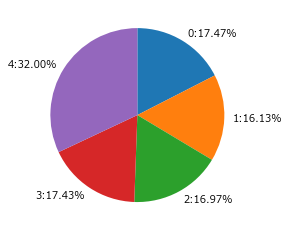

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
#文字化け対策
plt.rcParams['font.family'] = 'Meiryo'
fig = plt.figure()
fig.patch.set_facecolor('white')
#円グラフ作成
a=plt.pie(df_size['度数'], labels=["{:}:{:.2%}".format(i,df_size.loc[i]['割合']) for i in df_size.index], counterclock=False, startangle=90)


In [9]:
import re

#絶対分布


def absdist(df_km, xlist, k, n_bins):
    #サイズをあらわす棒グラフ
    fig, axes = plt.subplots(ncols=k, figsize=(
        20, 1.5), sharex=True, constrained_layout=True)
    fig.suptitle('サイズ')
    for j in range(k):
        axes[j].set_title("{:}: {:.2%}({:})"
        .format(j, df_size.loc[j]['割合'], df_size.loc[j]['度数']))
        #横棒グラフ
        axes[j].barh(y=[''], width=df_size.loc[j]['割合'])
        axes[j].set_xlim([0, 1])
    plt.show()

    for i, col in enumerate(xlist):
        fig, axes = plt.subplots(ncols=k, figsize=(
            20, 3), sharex=True, sharey=True, constrained_layout=True)
        fig.suptitle(col)
        y_max = len(df_km[col])
        for j in range(k):
            axes[j].set_title(str(j))
            #カテゴリ型は棒グラフ表示
            if df_km[col].dtype.name == 'category':
                df_km[df_km['$KM-K-Kmeans'] ==  j][col].value_counts().sort_index().plot.bar(ax=axes[j])
                axes[j].set_ylim([0, y_max])
            #数値型はヒストグラム表示
            elif re.sub(r'[0-9]+', '', df_km[col].dtype.name) in ['int', 'float']:
                data = df_km[df_km['$KM-K-Kmeans'] == j][col]
                axes[j].hist(data, bins=n_bins, label=col)


    plt.show()


matplotlibでヒストグラムの縦軸を相対度数（柱の高さの合計=1）や相対度数密度（ヒストグラム全体の面積=1）にする - Qiita<br>
https://qiita.com/kanedaq/items/1e7a0e52363224c08980#%E3%82%BD%E3%83%BC%E3%82%B9%E3%82%B3%E3%83%BC%E3%83%89jupyter-notebook%E3%81%A8%E6%8F%8F%E7%94%BB%E7%B5%90%E6%9E%9C

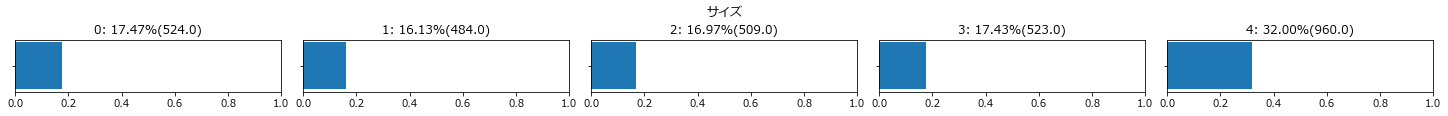

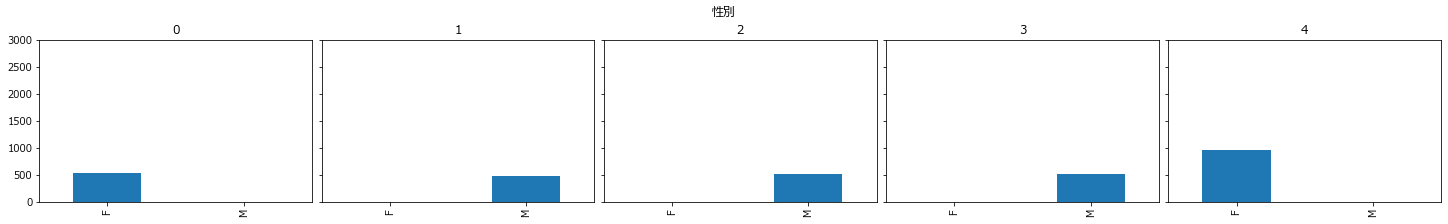

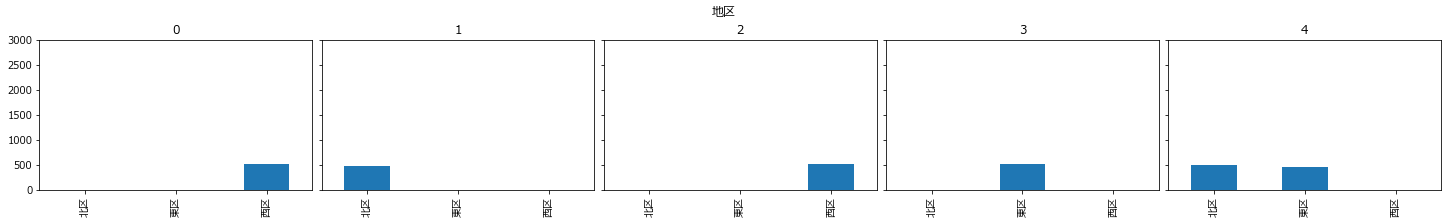

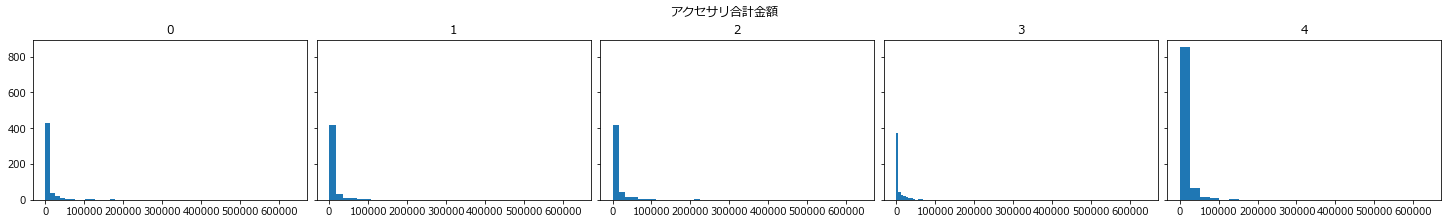

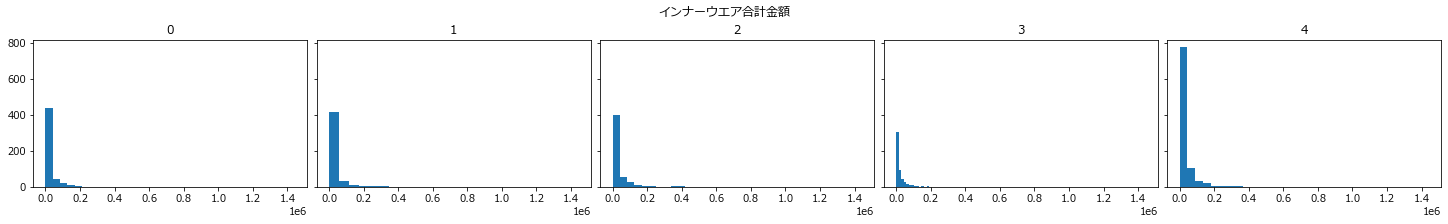

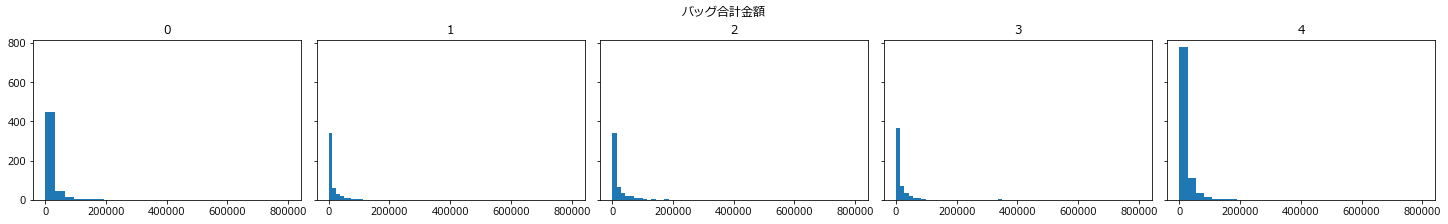

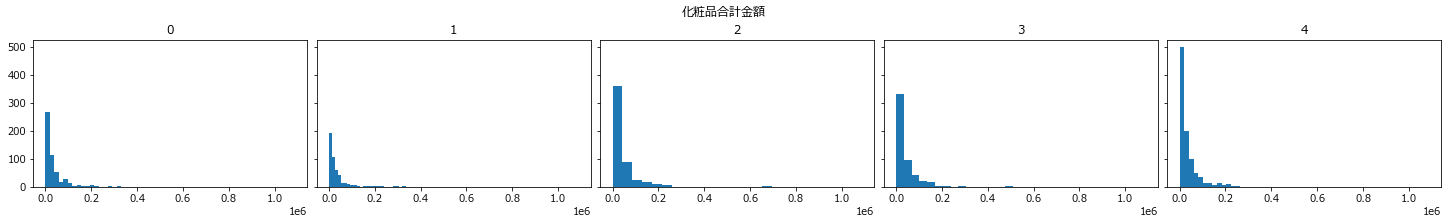

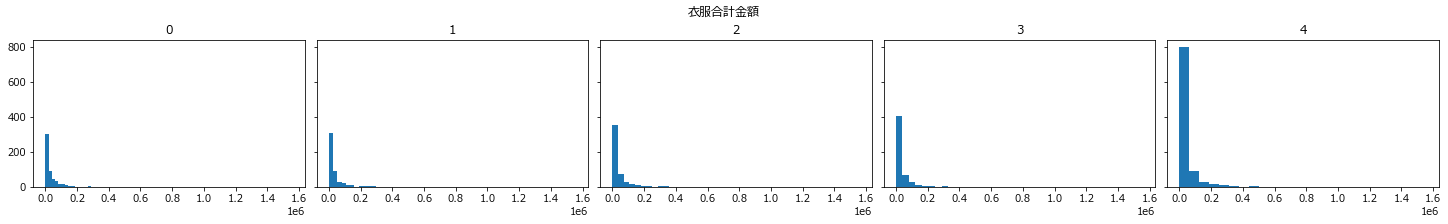

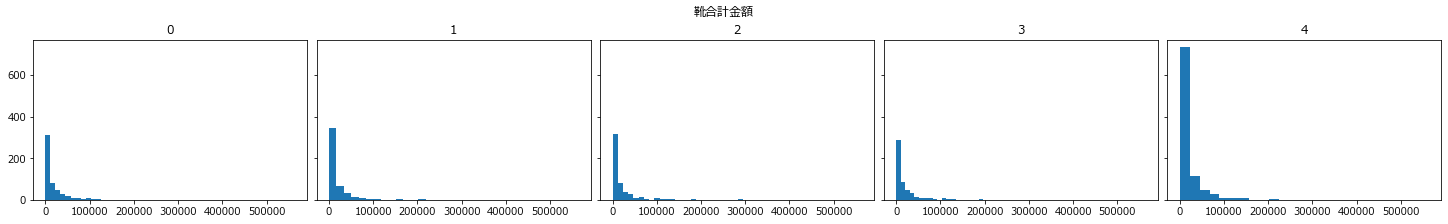

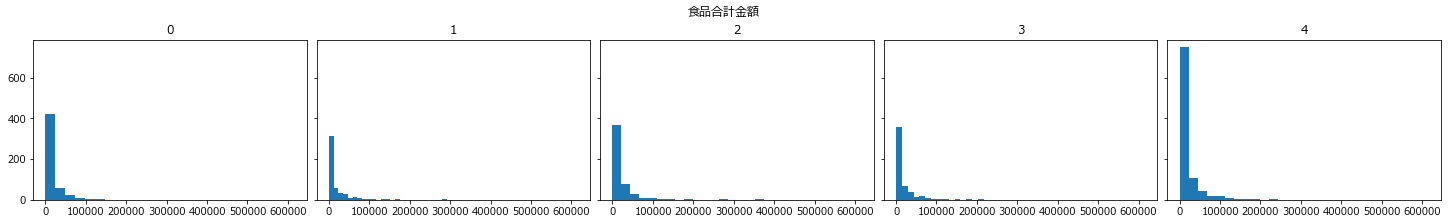

In [10]:
absdist(df_km,['性別', '地区', 'アクセサリ合計金額', 'インナーウエア合計金額', 'バッグ合計金額', '化粧品合計金額',
       '衣服合計金額', '靴合計金額', '食品合計金額'],k,25)

In [11]:
#相対分布
def reldist(df_km, xlist, k, n_bins):
    for i, col in enumerate(xlist):
        y_max = len(df_km[col])
        if re.sub(r'[0-9]+', '', df_km[col].dtype.name) in ['int', 'float']:
            fig, axes = plt.subplots(ncols=k, figsize=(
                20, 3), constrained_layout=True)
            fig.suptitle(col)
            df_tmp = df_km[['$KM-K-Kmeans', col]].copy()
            #あらかじめ全件でのビニングを行う
            df_tmp['bin'], fixed_bins = pd.cut(
                df_km[col], n_bins, labels=False, retbins=True)
            #各ビンに対するクラスターの相対度数を計算
            cluster_weights = df_tmp.groupby(['bin', '$KM-K-Kmeans']).size()/df_tmp.groupby(
                ['bin']).size()/df_tmp.groupby(['bin', '$KM-K-Kmeans']).size()
            cluster_weights.name = 'weight'
            df_tmp = df_tmp.merge(cluster_weights, on=['bin', '$KM-K-Kmeans'])
            for j in range(k):
                axes[j].set_title(str(j))
                data = df_tmp[df_tmp['$KM-K-Kmeans'] == j][col]
                weights = df_tmp[df_tmp['$KM-K-Kmeans'] == j]['weight']
                axes[j].hist(data, bins=fixed_bins, label=col, weights=weights)
                axes[j].set_ylim([0, 1])
    plt.show()


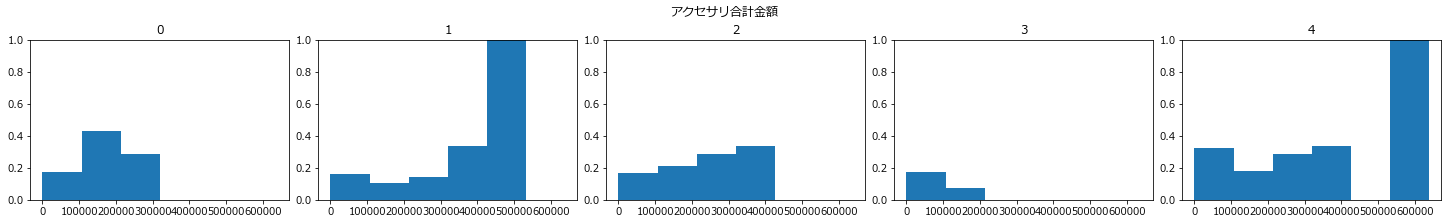

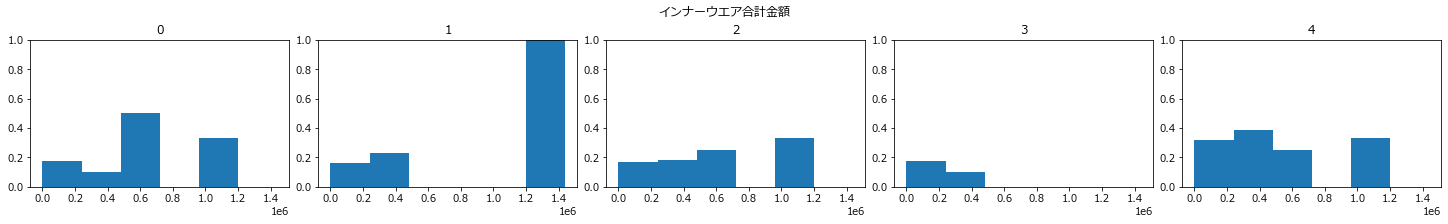

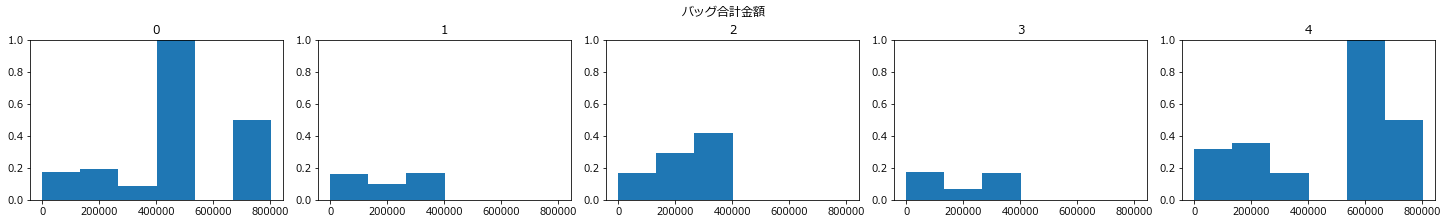

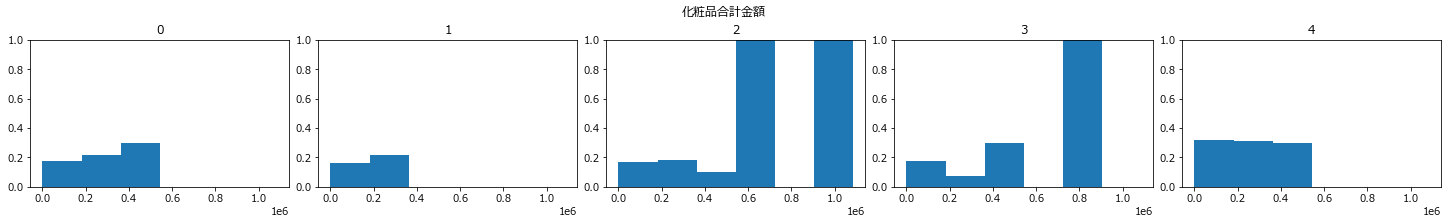

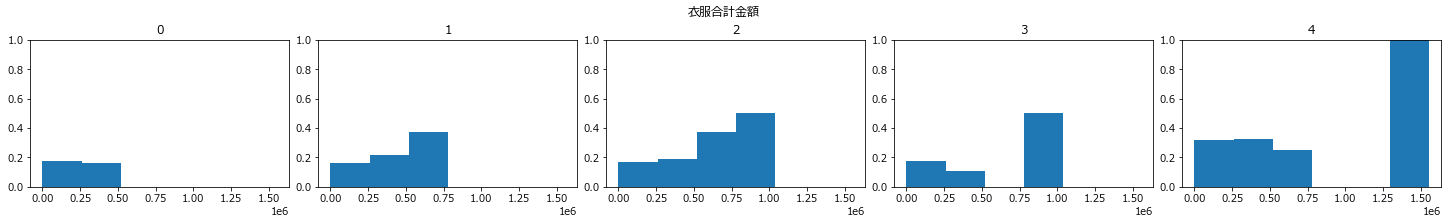

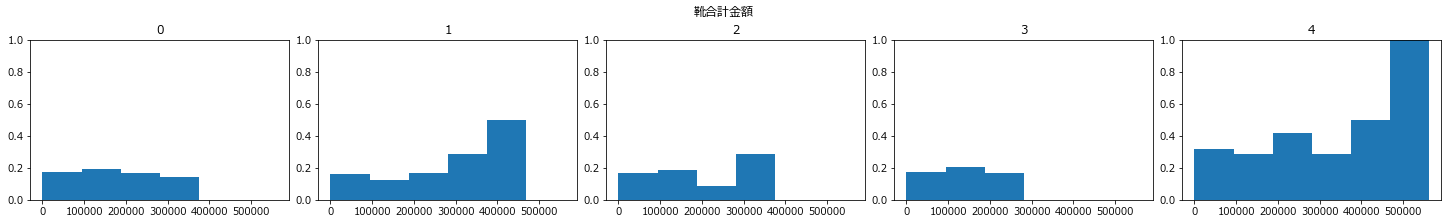

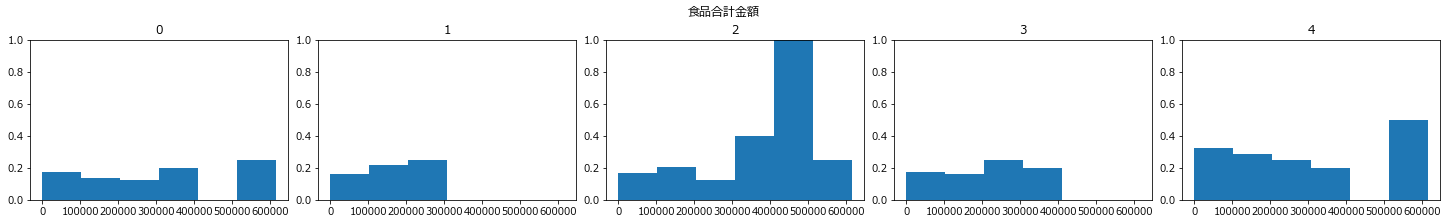

In [12]:
reldist(df_km,['性別', '地区', 'アクセサリ合計金額', 'インナーウエア合計金額', 'バッグ合計金額', '化粧品合計金額',
       '衣服合計金額', '靴合計金額', '食品合計金額'],k,6)

# 購入比のみでクラスタリング

In [13]:
#事前処理
from sklearn import preprocessing
df_km1 = df.copy()

mm = preprocessing.MinMaxScaler()
#比率を計算
df_km_num1 = df_km1[['アクセサリ合計金額', 'インナーウエア合計金額', 'バッグ合計金額', '化粧品合計金額',
                    '衣服合計金額', '靴合計金額', '食品合計金額']].div(df_km1['合計金額'], axis=0).astype('float')
#比率になって0－1になっているので、スケーリングは不要
#df_km_std1 = pd.DataFrame(mm.fit_transform(
#    df_km_num1), columns=df_km_num1.columns)
#数値列のnullは0.5に変換
df_km_num1 = df_km_num1.fillna(0.5)
# 説明変数
X = df_km_num1.add_suffix('_比率')
X

,アクセサリ合計金額_比率,インナーウエア合計金額_比率,バッグ合計金額_比率,化粧品合計金額_比率,衣服合計金額_比率,靴合計金額_比率,食品合計金額_比率
0,0.083850,0.078147,0.073366,0.272325,0.061039,0.272173,0.159100
1,0.000000,0.277888,0.060808,0.207266,0.115425,0.269821,0.068793
2,0.088265,0.000000,0.000000,0.000000,0.000000,0.000000,0.911735
3,0.000000,0.308099,0.169272,0.387916,0.134713,0.000000,0.000000
4,0.018736,0.400792,0.051584,0.247623,0.054348,0.204919,0.021997
...,...,...,...,...,...,...,...
2995,0.000000,0.000000,0.189793,0.022920,0.389498,0.000000,0.397789
2996,0.000000,0.038223,0.035364,0.367594,0.150100,0.370759,0.037959
2997,0.559556,0.000000,0.000000,0.021950,0.153519,0.264974,0.000000
2998,0.000000,0.165150,0.053086,0.367867,0.173624,0.224177,0.016094


In [14]:
df_km1=pd.concat([df_km1,X],axis=1)
df_km1

,CUSTID,性別,地区,アクセサリ合計金額,インナーウエア合計金額,バッグ合計金額,化粧品合計金額,衣服合計金額,靴合計金額,食品合計金額,合計金額,アクセサリ合計金額_比率,インナーウエア合計金額_比率,バッグ合計金額_比率,化粧品合計金額_比率,衣服合計金額_比率,靴合計金額_比率,食品合計金額_比率
0,100001,F,西区,8278.0,7715.0,7243,26885,6026,26870,15707,98724,0.083850,0.078147,0.073366,0.272325,0.061039,0.272173,0.159100
1,100004,M,北区,0.0,47262.0,10342,35251,19631,45890,11700,170076,0.000000,0.277888,0.060808,0.207266,0.115425,0.269821,0.068793
2,100005,M,西区,10500.0,0.0,0,0,0,0,108460,118960,0.088265,0.000000,0.000000,0.000000,0.000000,0.000000,0.911735
3,100006,M,東区,0.0,26210.0,14400,33000,11460,0,0,85070,0.000000,0.308099,0.169272,0.387916,0.134713,0.000000,0.000000
4,100008,F,東区,1017.0,21755.0,2800,13441,2950,11123,1194,54280,0.018736,0.400792,0.051584,0.247623,0.054348,0.204919,0.021997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,105967,F,北区,0.0,0.0,57800,6980,118619,0,121144,304543,0.000000,0.000000,0.189793,0.022920,0.389498,0.000000,0.397789
2996,105970,M,東区,0.0,13621.0,12602,130994,53489,132122,13527,356355,0.000000,0.038223,0.035364,0.367594,0.150100,0.370759,0.037959
2997,105972,F,西区,75558.0,0.0,0,2964,20730,35780,0,135032,0.559556,0.000000,0.000000,0.021950,0.153519,0.264974,0.000000
2998,105974,F,北区,0.0,40225.0,12930,89600,42289,54602,3920,243566,0.000000,0.165150,0.053086,0.367867,0.173624,0.224177,0.016094


In [15]:
# モデルの作成
from sklearn.cluster import KMeans

# kmeansのモデルを作成
k=5
km1 = KMeans(n_clusters=k, max_iter=20 ,tol=0,n_init=1, init=X[:5])
#km1 = KMeans(n_clusters=k, n_init=10, random_state=0,init='k-means++',algorithm='elkan')
km1.fit(X)
# データが属するクラスターのラベルを取得
df_km1['$KM-K-Kmeans']=km1.predict(X)
df_km1

,CUSTID,性別,地区,アクセサリ合計金額,インナーウエア合計金額,バッグ合計金額,化粧品合計金額,衣服合計金額,靴合計金額,食品合計金額,合計金額,アクセサリ合計金額_比率,インナーウエア合計金額_比率,バッグ合計金額_比率,化粧品合計金額_比率,衣服合計金額_比率,靴合計金額_比率,食品合計金額_比率,$KM-K-Kmeans
0,100001,F,西区,8278.0,7715.0,7243,26885,6026,26870,15707,98724,0.083850,0.078147,0.073366,0.272325,0.061039,0.272173,0.159100,0
1,100004,M,北区,0.0,47262.0,10342,35251,19631,45890,11700,170076,0.000000,0.277888,0.060808,0.207266,0.115425,0.269821,0.068793,0
2,100005,M,西区,10500.0,0.0,0,0,0,0,108460,118960,0.088265,0.000000,0.000000,0.000000,0.000000,0.000000,0.911735,2
3,100006,M,東区,0.0,26210.0,14400,33000,11460,0,0,85070,0.000000,0.308099,0.169272,0.387916,0.134713,0.000000,0.000000,3
4,100008,F,東区,1017.0,21755.0,2800,13441,2950,11123,1194,54280,0.018736,0.400792,0.051584,0.247623,0.054348,0.204919,0.021997,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,105967,F,北区,0.0,0.0,57800,6980,118619,0,121144,304543,0.000000,0.000000,0.189793,0.022920,0.389498,0.000000,0.397789,2
2996,105970,M,東区,0.0,13621.0,12602,130994,53489,132122,13527,356355,0.000000,0.038223,0.035364,0.367594,0.150100,0.370759,0.037959,0
2997,105972,F,西区,75558.0,0.0,0,2964,20730,35780,0,135032,0.559556,0.000000,0.000000,0.021950,0.153519,0.264974,0.000000,0
2998,105974,F,北区,0.0,40225.0,12930,89600,42289,54602,3920,243566,0.000000,0.165150,0.053086,0.367867,0.173624,0.224177,0.016094,3


In [16]:
df_km1.dtypes

CUSTID               int64
性別                category
地区                category
アクセサリ合計金額          float64
インナーウエア合計金額        float64
バッグ合計金額              int64
化粧品合計金額              int64
衣服合計金額               int64
靴合計金額                int64
食品合計金額               int64
合計金額                 int64
アクセサリ合計金額_比率       float64
インナーウエア合計金額_比率     float64
バッグ合計金額_比率         float64
化粧品合計金額_比率         float64
衣服合計金額_比率          float64
靴合計金額_比率           float64
食品合計金額_比率          float64
$KM-K-Kmeans         int32
dtype: object

In [17]:
print("反復回数:{:}".format(km1.n_iter_))

反復回数:13


In [18]:
# シルエット係数平均
from sklearn.metrics import silhouette_samples
silhouette_vals = silhouette_samples(X, df_km1['$KM-K-Kmeans'])
print("シルエット係数平均: {:.2f}".format(silhouette_vals.mean()))


シルエット係数平均: 0.25


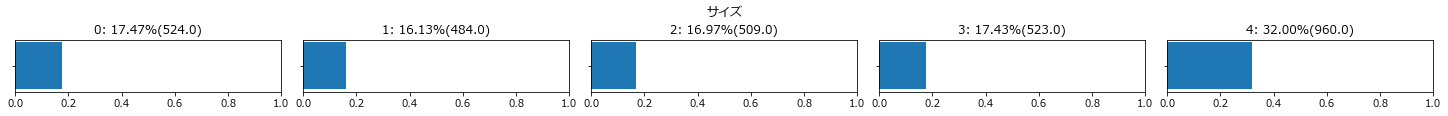

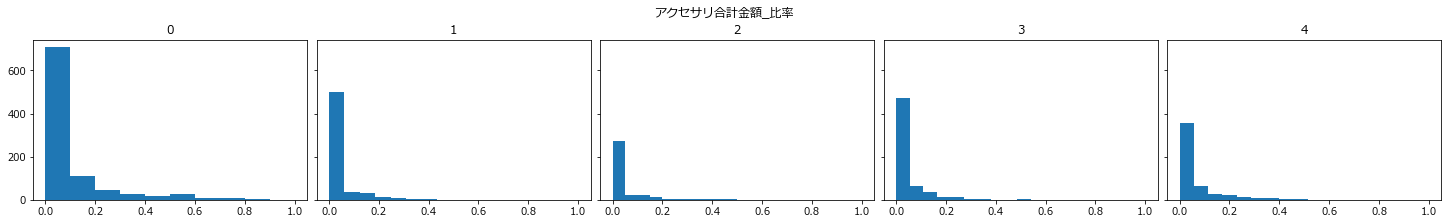

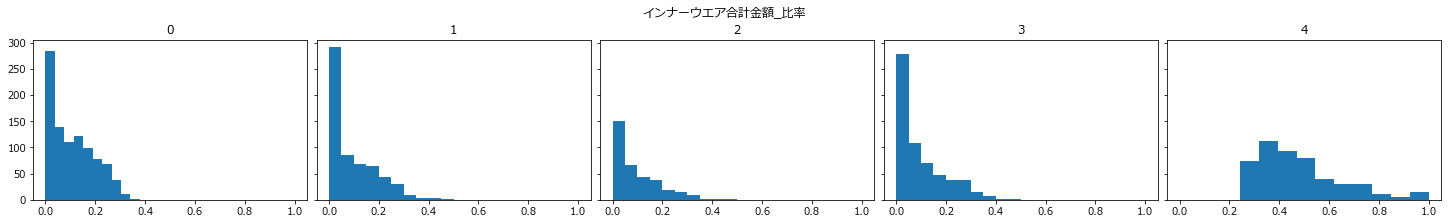

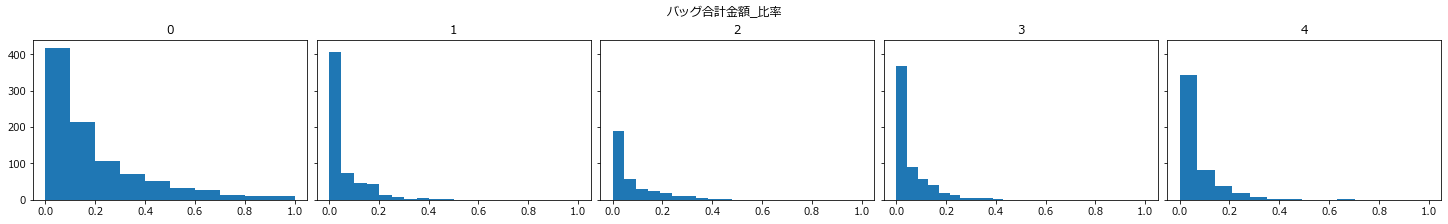

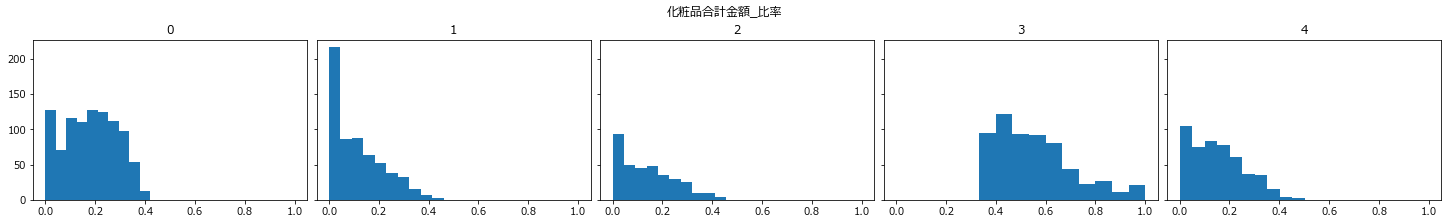

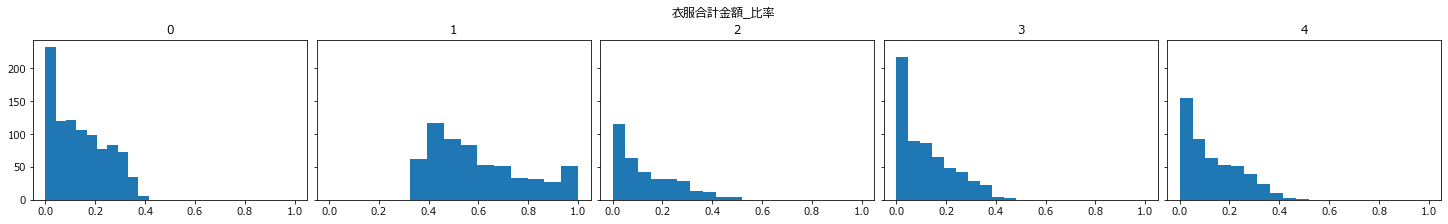

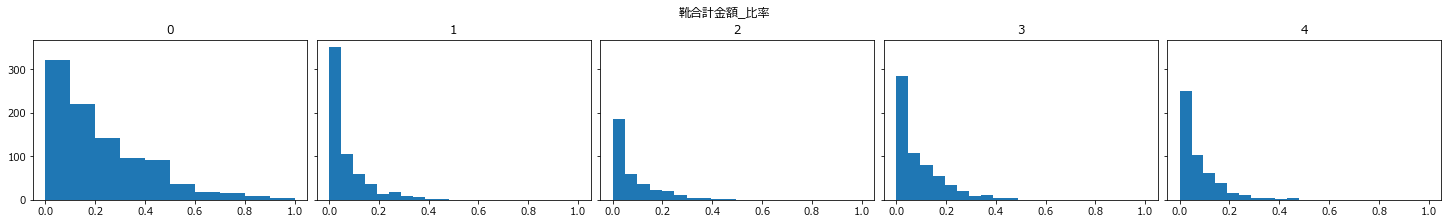

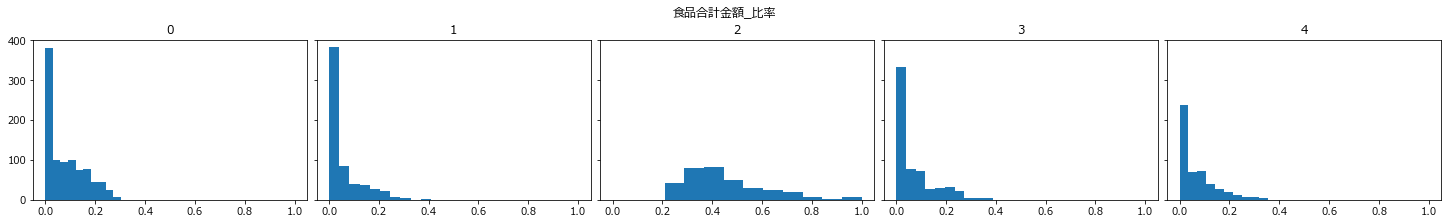

In [19]:
absdist(df_km1,['アクセサリ合計金額_比率', 'インナーウエア合計金額_比率', 'バッグ合計金額_比率', '化粧品合計金額_比率',
       '衣服合計金額_比率', '靴合計金額_比率', '食品合計金額_比率'],k,10)

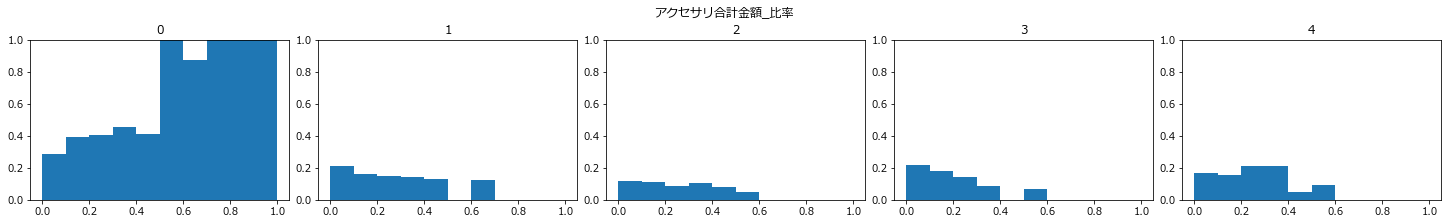

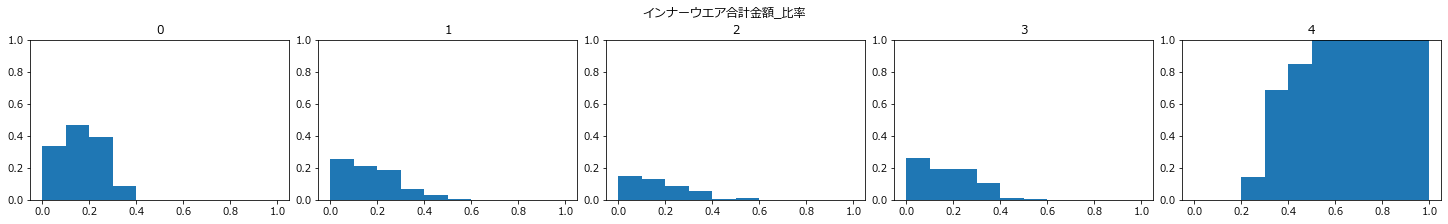

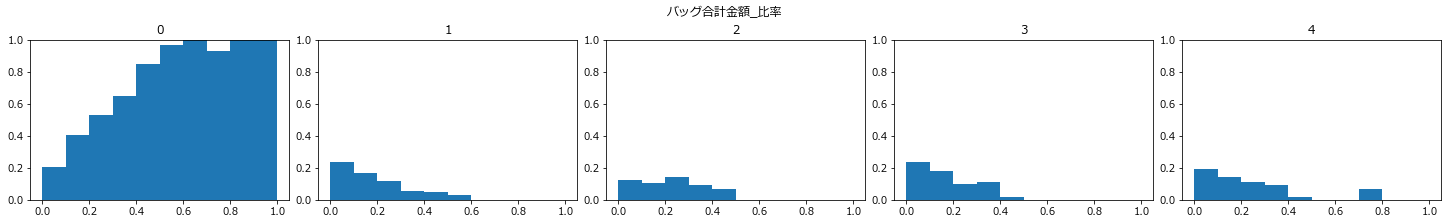

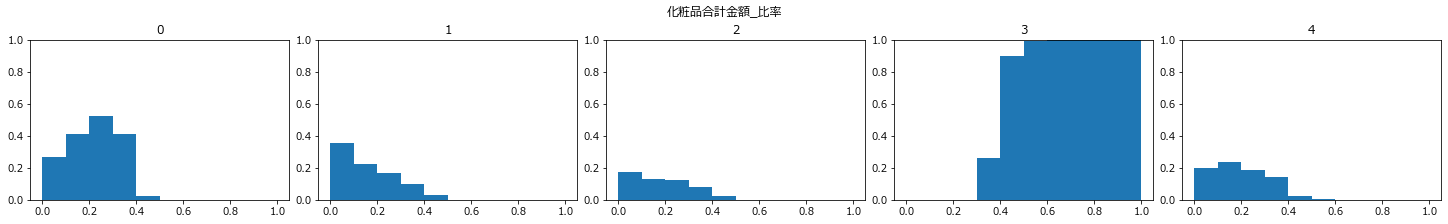

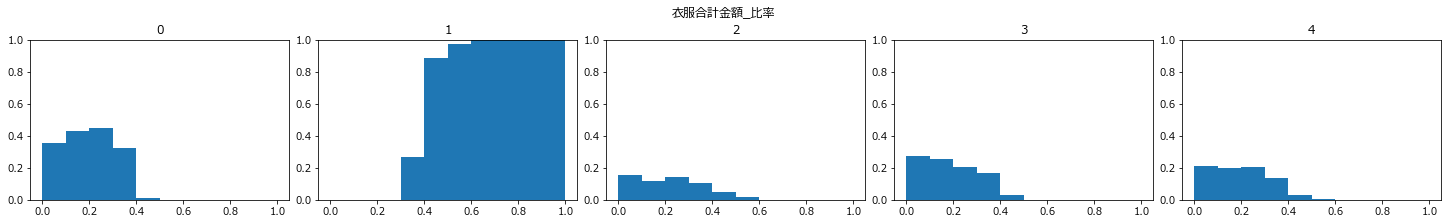

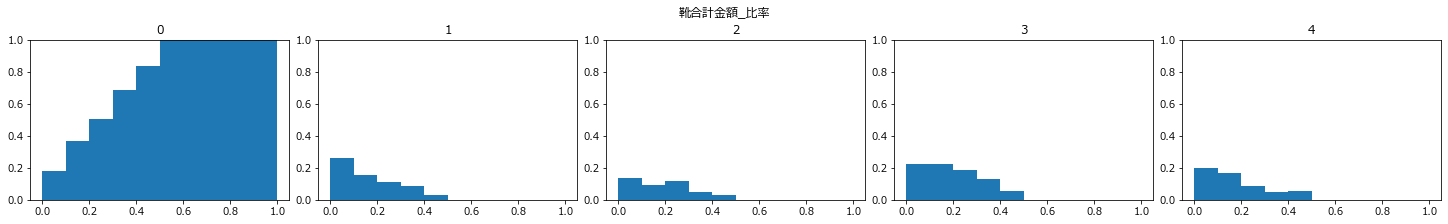

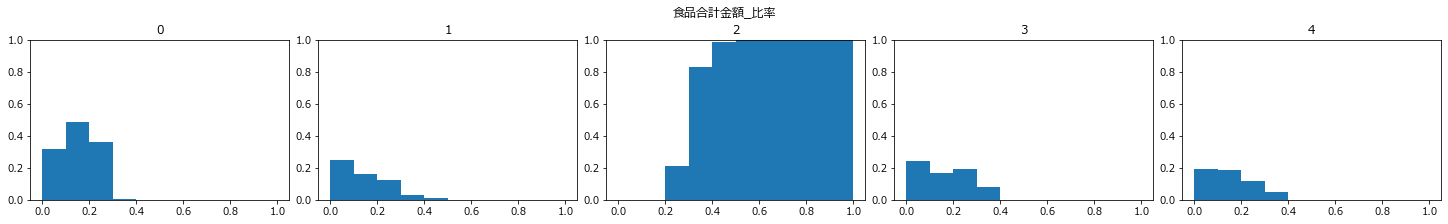

In [20]:
reldist(df_km1,['アクセサリ合計金額_比率', 'インナーウエア合計金額_比率', 'バッグ合計金額_比率', '化粧品合計金額_比率',
       '衣服合計金額_比率', '靴合計金額_比率', '食品合計金額_比率'],k,10)

In [21]:
#クラスター比較
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


def boxplot(df_km, xlist,k):
    sns.set(font='Meiryo')
    for i, col in enumerate(xlist):
        #数値データは箱ひげ図で比較する
        if re.sub(r'[0-9]+', '', df_km[col].dtype.name) in ['int', 'float']:
            fig = plt.figure(figsize=(20, 3), constrained_layout=True)
            ax = fig.add_subplot(1, 1, 1)
            sns.boxplot(x='$KM-K-Kmeans', y=col,
                        data=df_km, showfliers=False, ax=ax)
            plt.show()



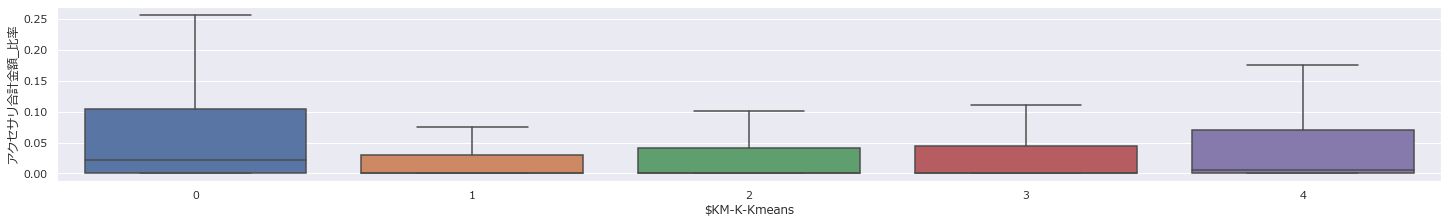

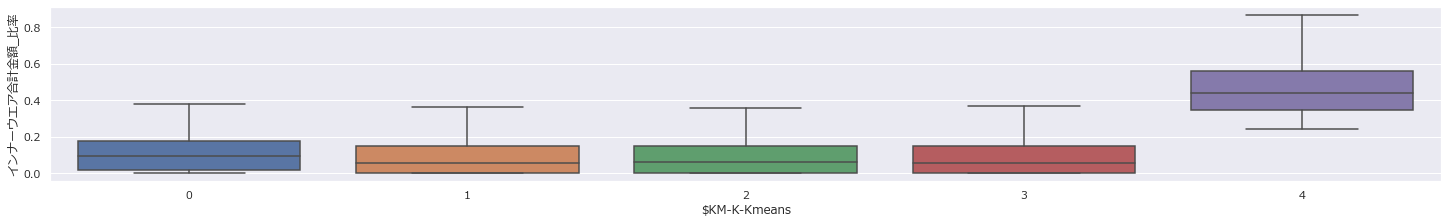

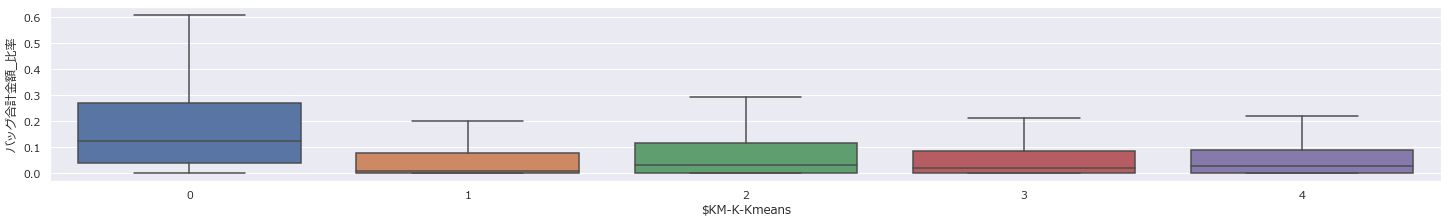

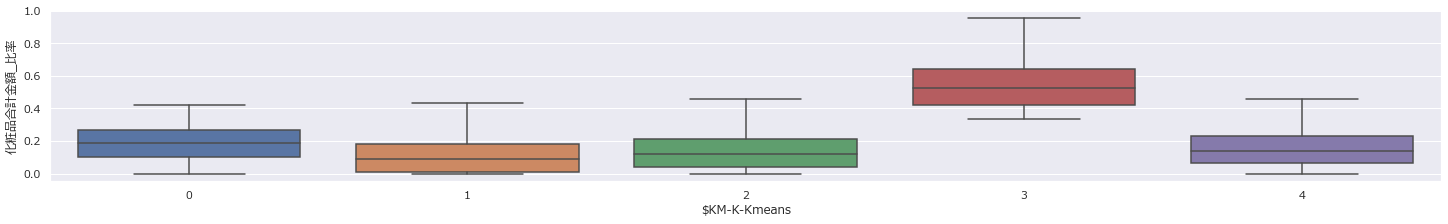

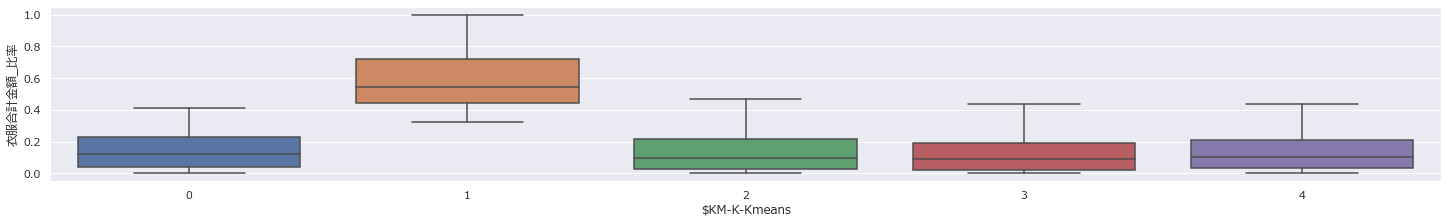

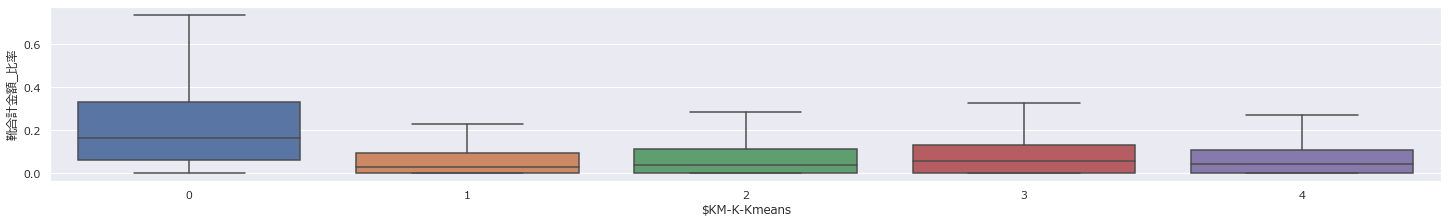

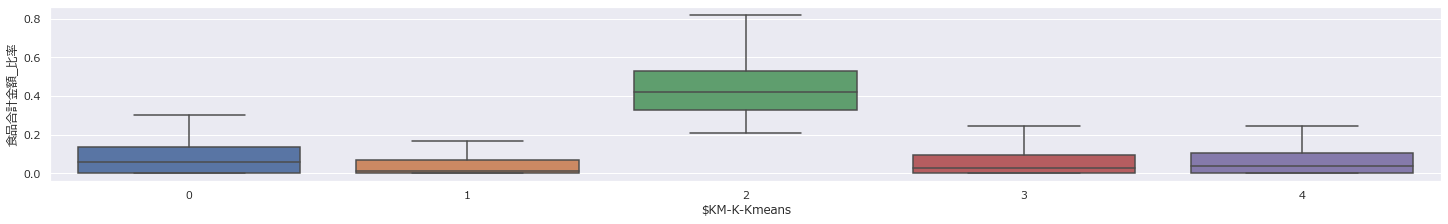

In [22]:
boxplot(df_km1,['アクセサリ合計金額_比率', 'インナーウエア合計金額_比率', 'バッグ合計金額_比率', '化粧品合計金額_比率',
       '衣服合計金額_比率', '靴合計金額_比率', '食品合計金額_比率'],k)


In [23]:
import sys

print(sys.version)
print(pd.__version__)
import sklearn
print(sklearn.__version__)


3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
1.4.1
1.1.1
